In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as T
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
import sys
sys.path.insert(0,'/content/gdrive/My Drive/Colab Notebooks')

Mounted at /content/gdrive/


In [ ]:
from project_utilities import Loss
from project_utilities import efficiency
from project_utilities import ValueSet

## DEVICE

In [ ]:
CUDA_DEVICE_NUM = 0
DEVICE = torch.device(f'cuda:{CUDA_DEVICE_NUM}' if torch.cuda.is_available() else 'cpu')
print('Device:', DEVICE)

Device: cuda:0


In [ ]:
%env CUBLAS_WORKSPACE_CONFIG=:4096:8

env: CUBLAS_WORKSPACE_CONFIG=:4096:8


In [ ]:
import os
print(os.environ["CUBLAS_WORKSPACE_CONFIG"])

:4096:8


In [ ]:
def set_deterministic():
    if torch.cuda.is_available():
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True
    torch.use_deterministic_algorithms(True)
set_deterministic()

## Datase class

In [ ]:
%cd /content/gdrive/MyDrive/dl_mid3/data

/content/gdrive/MyDrive/dl_mid3/data


In [ ]:
class MyDataset(torch.utils.data.Dataset):
  def __init__(self, setID):
        'Initialization'
        npz_files_content = np.load("./Set_"+str(setID)+".npz")

        self.X_set = torch.tensor(npz_files_content['X'])
        self.y_set = torch.tensor(npz_files_content['y'])
  def __len__(self):
        'Denotes the total number of samples'
        return len(self.y_set)
  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        X = self.X_set[index]
        y = self.y_set[index]
        return X, y

## Train and Validation Set

In [ ]:
# Large sample
train_set_idx, val_set_idx = train_test_split(list(range(1,80)), test_size=20)

In [ ]:
# Small sample
# train_set_idx, val_set_idx = train_test_split(list(range(1,20)), test_size=5)

In [ ]:
# train_set_idx = [1]

In [ ]:
# val_set_idx=[4]

In [ ]:
print(train_set_idx)
print(val_set_idx)

[61, 27, 29, 22, 72, 49, 68, 75, 42, 52, 71, 53, 4, 41, 26, 17, 60, 3, 6, 23, 70, 55, 67, 62, 51, 64, 76, 7, 56, 13, 24, 1, 5, 77, 45, 19, 15, 74, 79, 20, 16, 11, 8, 28, 65, 18, 58, 35, 73, 31, 2, 48, 38, 9, 59, 78, 63, 34, 50]
[32, 37, 47, 33, 14, 57, 66, 46, 54, 21, 12, 44, 36, 25, 43, 39, 30, 40, 10, 69]


## Dummy training loop

In [ ]:
# Train loader
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("Time - ", dt_string)
total_train_start = time.time()
for (idx, setID) in enumerate(train_set_idx):
  train_set = MyDataset(setID)
  train_loader = torch.utils.data.DataLoader(train_set,
                                             batch_size = 128,
                                             shuffle = True)
  print(f"Set Number - {idx + 1}")
  set_start = time.time()
  for X_train, y_train in train_loader:
    # print(X_train.shape)
    # print(y_train.shape)
    # break
    print(".", end=" ")
  set_end = time.time()
  print(f"\nSet time : {set_end - set_start} secs")
total_train_end = time.time()
print(f"Total train time : {(total_train_end - total_train_start) / 60} minutes")
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("Time - ", dt_string)

# Validation loader
total_val_start = time.time()
for (idx, setID) in enumerate(val_set_idx):
  val_set = MyDataset(setID)
  val_loader = torch.utils.data.DataLoader(val_set,
                                           batch_size = 128,
                                           shuffle = True)
  print(f"Set Number - {idx + 1}")
  set_start = time.time()
  for X_val, y_val in val_loader:
    # print(X_val.shape)
    # print(y_val.shape)
    print(".", end=" ")
  set_end = time.time()
  print(f"\nSet time : {set_end - set_start}")
total_val_end = time.time()
print(f"Total train time : {(total_val_end - total_val_start) / 60} minutes")
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("Time - ", dt_string)

print(len(train_loader), len(train_set))
print(len(val_loader), len(val_set))

Time -  20/11/2022 04:19:34
Set Number - 1
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Set time : 0.16093134880065918 secs
Set Number - 2
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Set time : 0.1080925464630127 secs
Set Number - 3
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Set time : 0.21941089630126953 secs
Set Number - 4
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Set time : 0.19241094589233398 secs
Set Number - 5
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Set time : 0.11623644828796387 secs
Set Number - 6
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Set time : 0.1157083511352539 secs
Set Number - 7
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Set time : 0.1265876293182373 secs
Set Number - 8
. . . . . . . . . . . . . . . . . . 

## Plotting

In [ ]:
first_train_set_idx = train_set_idx[0]
train_set = MyDataset(1)
train_loader = torch.utils.data.DataLoader(train_set,
                                             batch_size = 128,
                                             shuffle = True)
single_X = None
single_y = None
for X_train, y_train in train_loader:
  print(X_train.shape)
  print(y_train.shape)
  first_X = X_train[0]
  first_y = y_train[0]
  print(first_X.shape)
  print(first_y.shape)
  single_X = first_X
  single_y = first_y
  break

torch.Size([128, 4, 4000])
torch.Size([128, 4000])
torch.Size([4, 4000])
torch.Size([4000])


In [ ]:
print(single_X[0].shape)
print(single_X[1].shape)
print(single_X[2].shape)
print(single_X[3].shape)

torch.Size([4000])
torch.Size([4000])
torch.Size([4000])
torch.Size([4000])


In [ ]:
x_axis = np.arange(0, 4000)
x_axis.shape

(4000,)

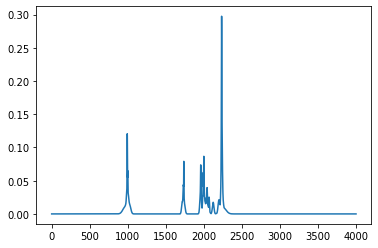

In [ ]:
plt.plot(x_axis, single_X[0])

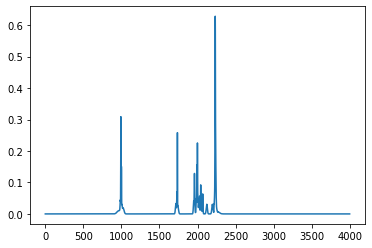

In [ ]:
plt.plot(x_axis, single_X[1])

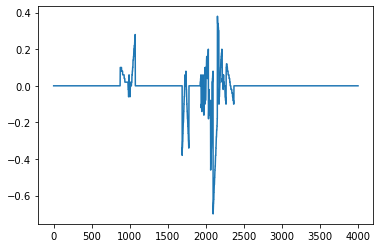

In [ ]:
plt.plot(x_axis, single_X[2])

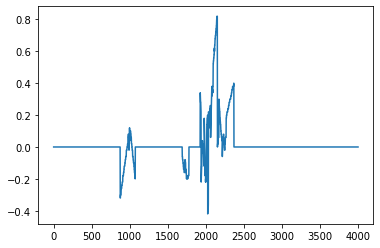

In [ ]:
plt.plot(x_axis, single_X[3])

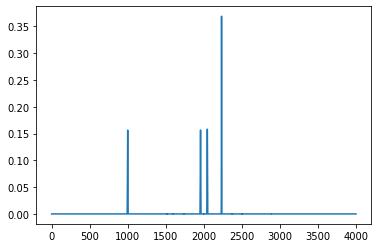

In [ ]:
plt.plot(x_axis, single_y)

## Architectures

In [ ]:
class Adaline(torch.nn.Module):
    def __init__(self, num_input_features, num_ouput_features):
        super(Adaline, self).__init__()
        self.flatten = torch.nn.Flatten()
        self.linear = torch.nn.Linear(num_input_features, num_ouput_features)

        # change random weights to zero
        # (don't do this for multi-layer nets!)
        #self.linear.weight.detach().zero_()
        #self.linear.bias.detach().zero_()
    def forward(self, x):

        netinputs = self.linear(self.flatten(x))
        activations = netinputs
        return activations

In [ ]:
## Doesn't work
class CNN2(torch.nn.Module):
  def __init__(self, num_input_features, num_ouput_features):
    super(CNN2, self).__init__()
    self.enco = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=3, stride=2),
        torch.nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=3, stride=2),
        torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=2, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=3, stride=2),
        torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=3, stride=2),
        torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=3, stride=2),
    )

    self.avgpool = torch.nn.AdaptiveAvgPool2d(72)

    #256 * 72 = 18432
    self.deco = torch.nn.Sequential(
        nn.Flatten()

    )

    # for m in self.modules():
    #   if isinstance(m, torch.torch.nn.Conv1d) or isinstance(m, torch.torch.n
    #     torch.nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlineari if m.bias is not None:
    #     m.bias.detach().zero_()

  def forward(self, x):
    # print("before cnn", x.reshape(1000, 1, 4, 4000).shape)
    x = self.enco(x.reshape(1000, 1, 4, 4000))
    # print(x)
    # print("xshape 1", x.shape)
    x = self.deco(x)
    # print("xshape 2", x.shape)
    # print(x)
    return x


In [ ]:
class Reshape(nn.Module):
    def __init__(self, *args):
        super().__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)

class CNN1(torch.nn.Module):
  def __init__(self, num_input_features, num_ouput_features):
    super(CNN1, self).__init__()
    self.cnn1 = torch.nn.Sequential(
        torch.nn.Conv1d(in_channels=4, out_channels=8, kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        # torch.nn.MaxPool1d(kernel_size=3, stride=2),
        torch.nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        # torch.nn.MaxPool1d(kernel_size=3, stride=2),
        torch.nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        # torch.nn.MaxPool1d(kernel_size=3, stride=2),
        torch.nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        # torch.nn.MaxPool1d(kernel_size=3, stride=2),
        # torch.nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
        # torch.nn.ReLU(),
        # torch.nn.MaxPool1d(kernel_size=3, stride=2),
        # torch.nn.Flatten(),
        # torch.nn.Linear(512, 200)

    )

    self.avgpool = torch.nn.AdaptiveAvgPool1d(72)

    #256 * 72 = 18432
    self.linear = torch.nn.Sequential(
        # torch.nn.Flatten(),
        # torch.nn.Linear( 200, 512),
        # torch.nn.Linear(  2000, 4000),
        # torch.nn.ReLU(True),
        # torch.nn.Dropout(p=0.5),
        # # torch.nn.Linear(2000, 4000),
        # Reshape(-1, 128, 4000),
        # torch.nn.ConvTranspose1d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1),
        # torch.nn.ReLU(),
        # torch.nn.MaxUnpool1d(kernel_size=3, stride=2),
        torch.nn.ConvTranspose1d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        # torch.nn.MaxUnpool1d(kernel_size=3, stride=2),
        torch.nn.ConvTranspose1d(in_channels=32, out_channels=16, kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        # torch.nn.MaxUnpool1d(kernel_size=3, stride=2),
        torch.nn.ConvTranspose1d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        # torch.nn.MaxUnpool1d(kernel_size=3, stride=2),
        torch.nn.ConvTranspose1d(in_channels=8, out_channels=1, kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.Flatten(),
        # torch.nn.Linear( 3755, 4000),
    )

    # for m in self.modules():
    #   if isinstance(m, torch.torch.nn.Conv1d) or isinstance(m, torch.torch.n
    #     torch.nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlineari if m.bias is not None:
    #     m.bias.detach().zero_()

  def forward(self, x):
    # print("before cnn", x.shape)
    x = self.cnn1(x)
    # print(x)
    # print("xshape 1", x.shape)
    x = self.linear(x)
    # print("xshape 2", x.shape)
    # print(x)
    return x


In [ ]:
class Reshape(nn.Module):
    def __init__(self, *args):
        super().__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)

class ConvolutedEncoder(torch.nn.Module):
  def __init__(self, num_input_features, num_ouput_features):
    super(ConvolutedEncoder, self).__init__()
    self.encoder = torch.nn.Sequential(
        torch.nn.Conv1d(in_channels=4, out_channels=8, kernel_size=1, stride=1, padding=0),
        torch.nn.BatchNorm1d(8),
        torch.nn.ReLU(inplace=True),
        torch.nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1),
        torch.nn.BatchNorm1d(16),
        torch.nn.ReLU(inplace=True),
        torch.nn.Conv1d(in_channels=16, out_channels=32, kernel_size=1, stride=1, padding=0),
        torch.nn.BatchNorm1d(32),
        torch.nn.ReLU(inplace=True),
        torch.nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
        torch.nn.BatchNorm1d(64),
        torch.nn.ReLU(inplace=True),

    )

    self.decoder = torch.nn.Sequential(
        torch.nn.ConvTranspose1d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1),
        torch.nn.BatchNorm1d(32),
        torch.nn.ReLU(inplace=True),
        torch.nn.ConvTranspose1d(in_channels=32, out_channels=16, kernel_size=1, stride=1, padding=0),
        torch.nn.BatchNorm1d(16),
        torch.nn.ReLU(inplace=True),
        torch.nn.ConvTranspose1d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding=1),
        torch.nn.BatchNorm1d(8),
        torch.nn.ReLU(inplace=True),
        torch.nn.ConvTranspose1d(in_channels=8, out_channels=1, kernel_size=1, stride=1, padding=0),
        torch.nn.BatchNorm1d(1),
        torch.nn.ReLU(inplace=True),
        torch.nn.Flatten(),
    )

    # for m in self.modules():
    #   if isinstance(m, torch.torch.nn.Conv1d) or isinstance(m, torch.torch.n
    #     torch.nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlineari if m.bias is not None:
    #     m.bias.detach().zero_()

  def forward(self, x):
    # print("before cnn", x.shape)
    x = self.encoder(x)
    # print("xshape 1", x.shape)
    x = self.decoder(x)
    # print("xshape 2", x.shape)
    # print(x)
    return x


In [ ]:
class Reshape(nn.Module):
    def __init__(self, *args):
        super().__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)

class ConvolutedEncoder2(torch.nn.Module):
  def __init__(self, num_input_features, num_ouput_features):
    super(ConvolutedEncoder2, self).__init__()
    self.encoder = torch.nn.Sequential(
        torch.nn.Conv1d(in_channels=4, out_channels=8, kernel_size=1, stride=1, padding=0),
        torch.nn.BatchNorm1d(8),
        torch.nn.ReLU(inplace=True),
        torch.nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1),
        torch.nn.BatchNorm1d(16),
        torch.nn.ReLU(inplace=True),
        torch.nn.Conv1d(in_channels=16, out_channels=32, kernel_size=1, stride=1, padding=0),
        torch.nn.BatchNorm1d(32),
        torch.nn.ReLU(inplace=True),
        torch.nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
        torch.nn.BatchNorm1d(64),
        torch.nn.ReLU(inplace=True),
        torch.nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
        torch.nn.BatchNorm1d(128),
        torch.nn.ReLU(inplace=True),
    )

    self.decoder = torch.nn.Sequential(
        torch.nn.ConvTranspose1d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1),
        torch.nn.BatchNorm1d(64),
        torch.nn.ReLU(inplace=True),
        torch.nn.ConvTranspose1d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1),
        torch.nn.BatchNorm1d(32),
        torch.nn.ReLU(inplace=True),
        torch.nn.ConvTranspose1d(in_channels=32, out_channels=16, kernel_size=1, stride=1, padding=0),
        torch.nn.BatchNorm1d(16),
        torch.nn.ReLU(inplace=True),
        torch.nn.ConvTranspose1d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding=1),
        torch.nn.BatchNorm1d(8),
        torch.nn.ReLU(inplace=True),
        torch.nn.ConvTranspose1d(in_channels=8, out_channels=1, kernel_size=1, stride=1, padding=0),
        torch.nn.BatchNorm1d(1),
        torch.nn.ReLU(inplace=True),
        torch.nn.Flatten(),
    )

    # for m in self.modules():
    #   if isinstance(m, torch.torch.nn.Conv1d) or isinstance(m, torch.torch.n
    #     torch.nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlineari if m.bias is not None:
    #     m.bias.detach().zero_()

  def forward(self, x):
    # print("before cnn", x.shape)
    x = self.encoder(x)
    # print("xshape 1", x.shape)
    x = self.decoder(x)
    # print("xshape 2", x.shape)
    # print(x)
    return x


In [ ]:
####################################################
##### Training and evaluation wrappers
###################################################
def train(model, num_epochs,
          learning_rate=0.01, seed=123, batch_size=128):
    cost = []

    torch.manual_seed(seed)

    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    now = datetime.now()
    dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
    print("Start Time - ", dt_string)
    total_train_start = time.time()

    for e in range(1,num_epochs):

      epoch_time_start = time.time()
      batch_num = 0
      for (idx, setID) in enumerate(train_set_idx):
          set_time_start = time.time()
          train_set = MyDataset(setID+1)
          train_generator = torch.utils.data.DataLoader(train_set,
                                                        batch_size=batch_size,
                                                        shuffle=True)
          print(f"Set index: {idx + 1}, Set Id: {setID}")
          for X_train, y_train in train_generator:
            X_train = X_train.to(DEVICE)
            y_train = y_train.to(DEVICE)
            batch_num = batch_num + 1
            #### Compute outputs ####
            yhat = model(X_train)
            loss = loss_model.forward(yhat, y_train)
            #### Reset gradients from previous iteration ####
            optimizer.zero_grad()

            #### Compute gradients ####
            loss.backward()

            #### Update weights ####
            optimizer.step()
            #### Logging ####
            with torch.no_grad():
                yhat = model.forward(X_train)
                curr_loss = loss_model.forward(yhat, y_train)
                print('Epoch ID: %d ' % e, end="")
                print('  Set ID: %d' % setID, end="")
                print('  Batch ID: %d' % batch_num, end="")
                print(' | Loss: %.5f' % curr_loss)
                cost.append(curr_loss)
          set_time_end = time.time()
          print(f"Set Time : {(set_time_end - set_time_start) / 60} minutes")
          print(f"Time till now : {(set_time_end - total_train_start) / 60} minutes")
      epoch_time_end = time.time()
      print(f"Epoch Time : {(epoch_time_end - epoch_time_start) / 60} minutes")
    total_train_end = time.time()
    print(f"Total time : {(total_train_end - total_train_start) / 60} minutes")
    return cost

## Instantiating the model

In [ ]:
loss_model = Loss(0.00001)
# model = None
# model = Adaline(4*4000, 4000)
# model = SimpleCNN5Layer_Ca()
# model = CNN1(4*4000, 4000)
# model = ConvolutedEncoder(4*4000, 4000)
model = ConvolutedEncoder2(4*4000, 4000)
model.to(DEVICE)

ConvolutedEncoder2(
  (encoder): Sequential(
    (0): Conv1d(4, 8, kernel_size=(1,), stride=(1,))
    (1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv1d(8, 16, kernel_size=(3,), stride=(1,), padding=(1,))
    (4): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv1d(16, 32, kernel_size=(1,), stride=(1,))
    (7): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (10): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
    (13): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspos

In [ ]:
sum(p.numel() for p in model.parameters())

64379

## Training

In [ ]:
cost = train(model,
             num_epochs=5,
             learning_rate=0.001,
             seed=123, batch_size=1000)

Start Time -  28/11/2022 01:48:21
Set index: 1, Set Id: 61
Epoch ID: 1   Set ID: 61  Batch ID: 1 | Loss: 6.82145
Epoch ID: 1   Set ID: 61  Batch ID: 2 | Loss: 1.99864
Epoch ID: 1   Set ID: 61  Batch ID: 3 | Loss: 6.20779
Epoch ID: 1   Set ID: 61  Batch ID: 4 | Loss: 2.02237
Epoch ID: 1   Set ID: 61  Batch ID: 5 | Loss: 1.53750
Set Time : 0.18621915181477863 minutes
Time till now : 0.18621922334035237 minutes
Set index: 2, Set Id: 27
Epoch ID: 1   Set ID: 27  Batch ID: 6 | Loss: 1.37135
Epoch ID: 1   Set ID: 27  Batch ID: 7 | Loss: 1.26471
Epoch ID: 1   Set ID: 27  Batch ID: 8 | Loss: 1.21345
Epoch ID: 1   Set ID: 27  Batch ID: 9 | Loss: 1.17861
Epoch ID: 1   Set ID: 27  Batch ID: 10 | Loss: 1.10298
Set Time : 0.1567540129025777 minutes
Time till now : 0.3429904063542684 minutes
Set index: 3, Set Id: 29
Epoch ID: 1   Set ID: 29  Batch ID: 11 | Loss: 4.05729
Epoch ID: 1   Set ID: 29  Batch ID: 12 | Loss: 2.40919
Epoch ID: 1   Set ID: 29  Batch ID: 13 | Loss: 2.18071
Epoch ID: 1   Set ID:

## Validation

In [ ]:
def validate(model):
    loss_val = []
    eff = ValueSet(0, 0, 0, 0)
    # switch to evaluate mode
    model.eval()
    with torch.no_grad():
        for setID in val_set_idx:
          val_set = MyDataset(setID+1)
          val_generator = torch.utils.data.DataLoader(val_set,
                                                      batch_size=500,
                                                      shuffle=True)
          print(setID)
          for X_val, y_val in val_generator:
            # Forward pass
            X_val = X_val.to(DEVICE)
            y_val = y_val.to(DEVICE)
            val_outputs = model(X_val)
            loss_output = loss_model.forward(val_outputs, y_val)
            loss_val.append(loss_output)
            for label, output in zip(y_val.cpu().numpy(), val_outputs.cpu().numpy()):
                eff += efficiency(label, output, difference = 5.0,
                                  threshold = 1e-2, integral_threshold = 0.2,
                                  min_width = 3)
    return sum(loss_val)/len(loss_val), eff.eff_rate, eff.fp_rate

In [ ]:
loss_val, eff_rate, fp_rate = validate(model)
print('Loss: %0.3f ' % loss_val, end="")
print('  Efficiency: %0.3f' % eff_rate, end="")
print('  False positive rate: %0.3f' % fp_rate)

32
37
47
33
14
57
66
46
54
21
12
44
36
25
43
39
30
40
10
69
Loss: 0.072   Efficiency: 0.736  False positive rate: 0.193


## Plotting

In [ ]:
plot_set = MyDataset(1)
plot_generator = torch.utils.data.DataLoader(plot_set,
                                                        batch_size=250,
                                                        shuffle=True)


y hat = y true tensor(3860, device='cuda:0') 4000
y hat = y true tensor(3881, device='cuda:0') 4000
y hat = y true tensor(3949, device='cuda:0') 4000
y hat = y true tensor(3910, device='cuda:0') 4000
y hat = y true tensor(3935, device='cuda:0') 4000
y hat = y true tensor(3924, device='cuda:0') 4000
y hat = y true tensor(3955, device='cuda:0') 4000
y hat = y true tensor(3931, device='cuda:0') 4000
y hat = y true tensor(3938, device='cuda:0') 4000
y hat = y true tensor(3866, device='cuda:0') 4000
y hat = y true tensor(3887, device='cuda:0') 4000
y hat = y true tensor(3928, device='cuda:0') 4000
y hat = y true tensor(3923, device='cuda:0') 4000
y hat = y true tensor(3901, device='cuda:0') 4000
y hat = y true tensor(3850, device='cuda:0') 4000
y hat = y true tensor(3930, device='cuda:0') 4000
y hat = y true tensor(3918, device='cuda:0') 4000
y hat = y true tensor(3837, device='cuda:0') 4000
y hat = y true tensor(3939, device='cuda:0') 4000
y hat = y true tensor(3919, device='cuda:0') 4000


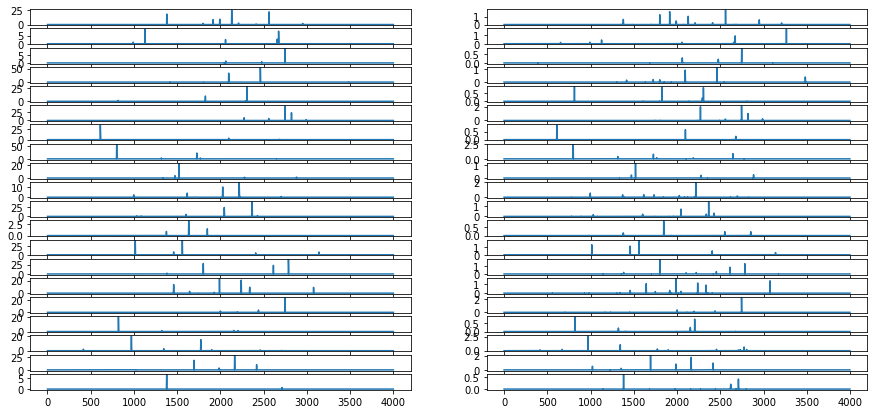

In [ ]:
fig, axs = plt.subplots(5000 // 250, 2, figsize=(15, 7))
cnt = 0
for X_train, y_train in plot_generator:
    X_train = X_train.to(DEVICE)
    y_train = y_train.to(DEVICE)
    yhat = model(X_train)
    # print("y hat",yhat[0], yhat[0].shape)
    # print("y true", y_train)
    x_axis = np.arange(0, 4000)
    axs[cnt][0].plot(x_axis, yhat[0].detach().cpu().numpy())
    axs[cnt][1].plot(x_axis, y_train[0].detach().cpu().numpy())
    print("y hat = y true", torch.sum(yhat[0] == y_train[0]), len(yhat[0]))
    cnt += 1
    # break

## Model Saving

In [ ]:
%cd /content/gdrive/My Drive/dl_mid3/models/

/content/gdrive/My Drive/dl_mid3/models


In [ ]:
torch.save(model.state_dict(), 'M14883318_model_conv_encoder_2.pt')